In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.ensemble
import seaborn as sns
import sklearn.preprocessing
import sklearn.model_selection
import sklearn.metrics
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import sklearn.feature_selection
import csv 
import torch
import torch.nn as nn
import sys
import random
import scipy.stats
from torch.utils.data import random_split

In [3]:
#Lectura del archivo
from google.colab import files 
uploaded = files.upload()

#Descomprimimos el zip
!unzip Dataset_proyecto.zip 


Saving Dataset_proyecto.zip to Dataset_proyecto.zip
Archive:  Dataset_proyecto.zip
  inflating: body_acc_x_entrenamiento.csv  
  inflating: body_acc_x_prueba.csv   
  inflating: body_acc_x_validacion.csv  
  inflating: body_acc_y_entrenamiento.csv  
  inflating: body_acc_y_prueba.csv   
  inflating: body_acc_y_validacion.csv  
  inflating: body_acc_z_entrenamiento.csv  
  inflating: body_acc_z_prueba.csv   
  inflating: body_acc_z_validacion.csv  
  inflating: body_gyro_x_entrenamiento.csv  
  inflating: body_gyro_x_prueba.csv  
  inflating: body_gyro_x_validacion.csv  
  inflating: body_gyro_y_entrenamiento.csv  
  inflating: body_gyro_y_prueba.csv  
  inflating: body_gyro_y_validacion.csv  
  inflating: body_gyro_z_entrenamiento.csv  
  inflating: body_gyro_z_prueba.csv  
  inflating: body_gyro_z_validacion.csv  
  inflating: total_acc_x_entrenamiento.csv  
  inflating: total_acc_x_prueba.csv  
  inflating: total_acc_x_validacion.csv  
  inflating: total_acc_y_entrenamiento.csv  
  i

In [4]:
#Archivos csv donde se guardaran los resultados
from google.colab import files 
uploaded = files.upload()

#Descomprimimos el zip
!unzip Resultados.zip 

Saving Resultados.zip to Resultados.zip
Archive:  Resultados.zip
  inflating: ResultadosRF.csv        
  inflating: ResultadosRN.csv        


## **Lectura de los datasets**

In [28]:
#Lectura de los datos de entrenamiento
Entrena1 = pd.read_csv('body_acc_x_entrenamiento.csv')
Entrena2 = pd.read_csv('body_acc_y_entrenamiento.csv')
Entrena3 = pd.read_csv('body_acc_z_entrenamiento.csv')
Entrena4 = pd.read_csv('body_gyro_x_entrenamiento.csv')
Entrena5 = pd.read_csv('body_gyro_y_entrenamiento.csv')
Entrena6 = pd.read_csv('body_gyro_z_entrenamiento.csv')
Entrena7 = pd.read_csv('total_acc_x_entrenamiento.csv')
Entrena8 = pd.read_csv('total_acc_y_entrenamiento.csv')
Entrena9 = pd.read_csv('total_acc_z_entrenamiento.csv')

#Lectura de los datos de validacion
Vali1 = pd.read_csv('body_acc_x_validacion.csv')
Vali2 = pd.read_csv('body_acc_y_validacion.csv')
Vali3 = pd.read_csv('body_acc_z_validacion.csv')
Vali4 = pd.read_csv('body_gyro_x_validacion.csv')
Vali5 = pd.read_csv('body_gyro_y_validacion.csv')
Vali6 = pd.read_csv('body_gyro_z_validacion.csv')
Vali7 = pd.read_csv('total_acc_x_validacion.csv')
Vali8 = pd.read_csv('total_acc_y_validacion.csv')
Vali9 = pd.read_csv('total_acc_z_validacion.csv')

#Lectura de los datos de prueba
Prueba1 = pd.read_csv('body_acc_x_prueba.csv')
Prueba2 = pd.read_csv('body_acc_y_prueba.csv')
Prueba3 = pd.read_csv('body_acc_z_prueba.csv')
Prueba4 = pd.read_csv('body_gyro_x_prueba.csv')
Prueba5 = pd.read_csv('body_gyro_y_prueba.csv')
Prueba6 = pd.read_csv('body_gyro_z_prueba.csv')
Prueba7 = pd.read_csv('total_acc_x_prueba.csv')
Prueba8 = pd.read_csv('total_acc_y_prueba.csv')
Prueba9 = pd.read_csv('total_acc_z_prueba.csv')


#Labels de los distintos conjuntos
labels_entrena = pd.read_csv('y_entrenamiento.csv')
labels_entrena = labels_entrena['Category']-1

labels_vali = pd.read_csv('y_validacion.csv')
labels_vali = labels_vali['Category']-1


## **Análisis de señales (Comparativa)**

### Comparacion Body_acc_x y total_acc_x (2 muestras por conjunto)

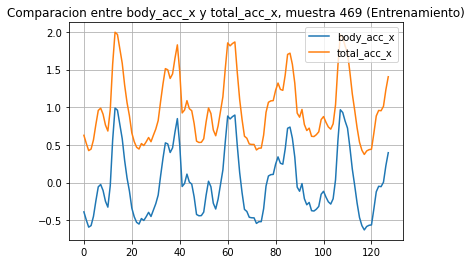

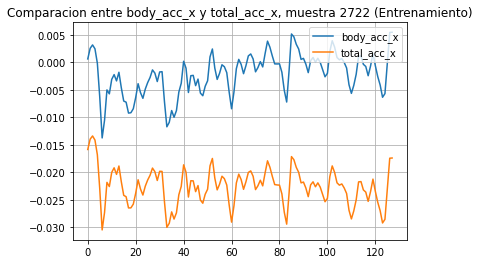

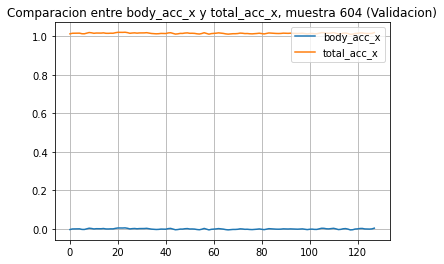

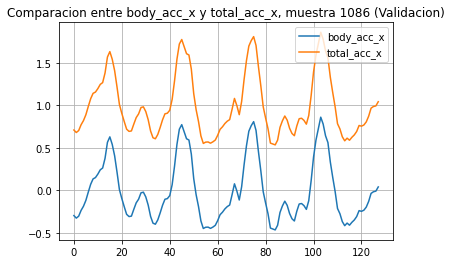

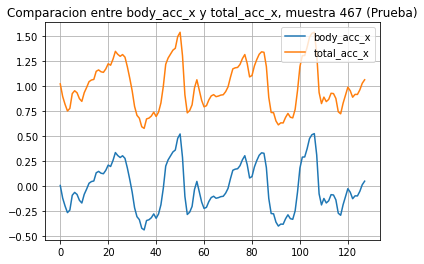

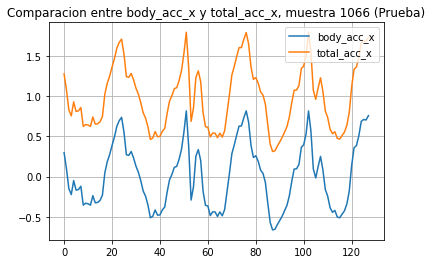

In [29]:
x = range(0,128)
a = random.randint(0, 2799)
plt.plot(x,Entrena1.iloc[a],label='body_acc_x')
plt.plot(x,Entrena7.iloc[a],label='total_acc_x')
plt.title('Comparacion entre body_acc_x y total_acc_x, muestra '+str(a)+' (Entrenamiento)')
plt.legend(loc='upper right')
plt.grid()
plt.show()

b = random.randint(0, 2799)
plt.plot(x,Entrena1.iloc[b],label='body_acc_x')
plt.plot(x,Entrena7.iloc[b],label='total_acc_x')
plt.title('Comparacion entre body_acc_x y total_acc_x, muestra '+str(b)+' (Entrenamiento)')
plt.legend(loc='upper right')
plt.grid()
plt.show()

c = random.randint(0, 1999)
plt.plot(x,Vali1.iloc[c],label='body_acc_x')
plt.plot(x,Vali7.iloc[c],label='total_acc_x')
plt.title('Comparacion entre body_acc_x y total_acc_x, muestra '+str(c)+' (Validacion)')
plt.legend(loc='upper right')
plt.grid()
plt.show()

d = random.randint(0, 1999)
plt.plot(x,Vali1.iloc[d],label='body_acc_x')
plt.plot(x,Vali7.iloc[d],label='total_acc_x')
plt.title('Comparacion entre body_acc_x y total_acc_x, muestra '+str(d)+' (Validacion)')
plt.legend(loc='upper right')
plt.grid()
plt.show()

e = random.randint(0, 1999)
plt.plot(x,Prueba1.iloc[e],label='body_acc_x')
plt.plot(x,Prueba7.iloc[e],label='total_acc_x')
plt.title('Comparacion entre body_acc_x y total_acc_x, muestra '+str(e)+' (Prueba)')
plt.legend(loc='upper right')
plt.grid()
plt.show()

f = random.randint(0, 1999)
plt.plot(x,Prueba1.iloc[f],label='body_acc_x')
plt.plot(x,Prueba7.iloc[f],label='total_acc_x')
plt.title('Comparacion entre body_acc_x y total_acc_x, muestra '+str(f)+' (Prueba)')
plt.legend(loc='upper right')
plt.grid()
plt.show()


### Comparacion body_acc_y y total_acc_y (2 muestras por conjunto)

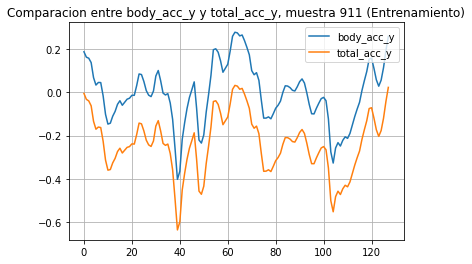

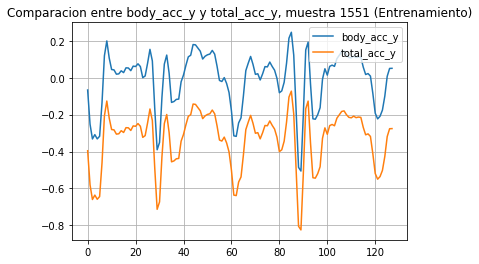

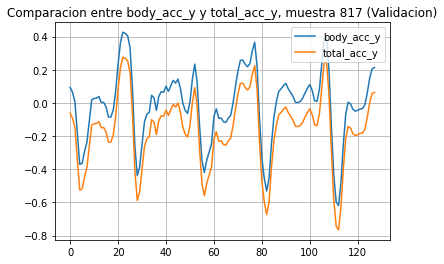

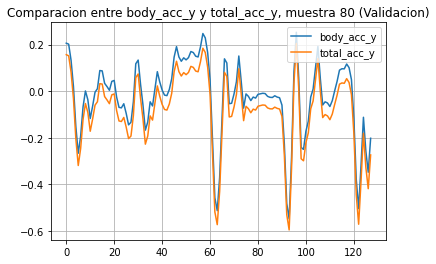

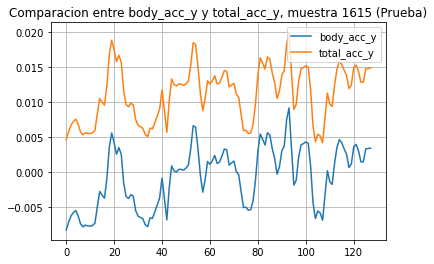

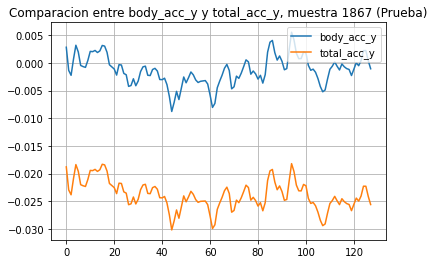

In [30]:
a = random.randint(0, 2799)
plt.plot(x,Entrena2.iloc[a],label='body_acc_y')
plt.plot(x,Entrena8.iloc[a],label='total_acc_y')
plt.title('Comparacion entre body_acc_y y total_acc_y, muestra '+str(a)+' (Entrenamiento)')
plt.legend(loc='upper right')
plt.grid()
plt.show()

b = random.randint(0, 2799)
plt.plot(x,Entrena2.iloc[b],label='body_acc_y')
plt.plot(x,Entrena8.iloc[b],label='total_acc_y')
plt.title('Comparacion entre body_acc_y y total_acc_y, muestra '+str(b)+' (Entrenamiento)')
plt.legend(loc='upper right')
plt.grid()
plt.show()

c = random.randint(0, 1999)
plt.plot(x,Vali2.iloc[c],label='body_acc_y')
plt.plot(x,Vali8.iloc[c],label='total_acc_y')
plt.title('Comparacion entre body_acc_y y total_acc_y, muestra '+str(c)+' (Validacion)')
plt.legend(loc='upper right')
plt.grid()
plt.show()

d = random.randint(0, 1999)
plt.plot(x,Vali2.iloc[d],label='body_acc_y')
plt.plot(x,Vali8.iloc[d],label='total_acc_y')
plt.title('Comparacion entre body_acc_y y total_acc_y, muestra '+str(d)+' (Validacion)')
plt.legend(loc='upper right')
plt.grid()
plt.show()

e = random.randint(0, 1999)
plt.plot(x,Prueba2.iloc[e],label='body_acc_y')
plt.plot(x,Prueba8.iloc[e],label='total_acc_y')
plt.title('Comparacion entre body_acc_y y total_acc_y, muestra '+str(e)+' (Prueba)')
plt.legend(loc='upper right')
plt.grid()
plt.show()

f = random.randint(0, 1999)
plt.plot(x,Prueba2.iloc[f],label='body_acc_y')
plt.plot(x,Prueba8.iloc[f],label='total_acc_y')
plt.title('Comparacion entre body_acc_y y total_acc_y, muestra '+str(f)+' (Prueba)')
plt.legend(loc='upper right')
plt.grid()
plt.show()

### Comparación body_acc_z y total_acc_z (2 muestras por conjunto)

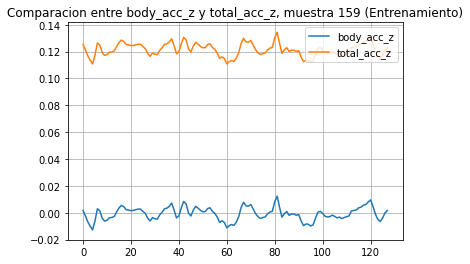

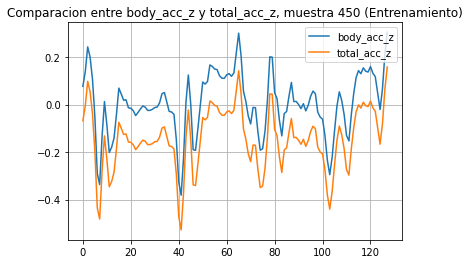

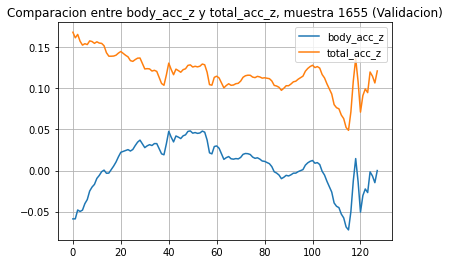

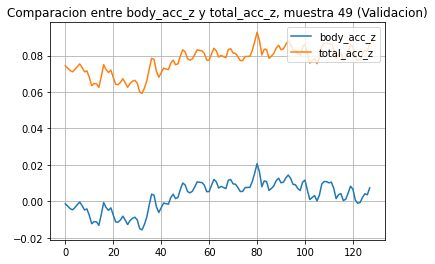

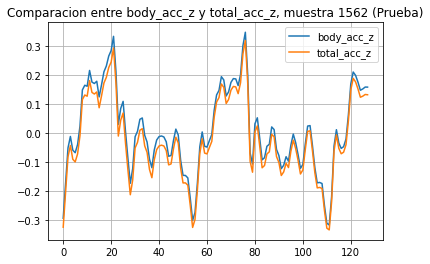

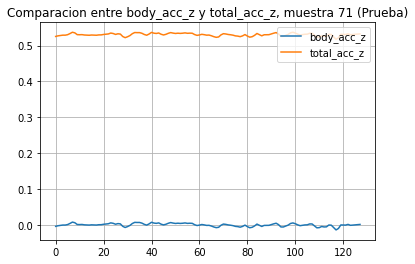

In [31]:
a = random.randint(0, 2799)
plt.plot(x,Entrena3.iloc[a],label='body_acc_z')
plt.plot(x,Entrena9.iloc[a],label='total_acc_z')
plt.title('Comparacion entre body_acc_z y total_acc_z, muestra '+str(a)+' (Entrenamiento)')
plt.legend(loc='upper right')
plt.grid()
plt.show()

b = random.randint(0, 2799)
plt.plot(x,Entrena3.iloc[b],label='body_acc_z')
plt.plot(x,Entrena9.iloc[b],label='total_acc_z')
plt.title('Comparacion entre body_acc_z y total_acc_z, muestra '+str(b)+' (Entrenamiento)')
plt.legend(loc='upper right')
plt.grid()
plt.show()

c = random.randint(0, 1999)
plt.plot(x,Vali3.iloc[c],label='body_acc_z')
plt.plot(x,Vali9.iloc[c],label='total_acc_z')
plt.title('Comparacion entre body_acc_z y total_acc_z, muestra '+str(c)+' (Validacion)')
plt.legend(loc='upper right')
plt.grid()
plt.show()

d = random.randint(0, 1999)
plt.plot(x,Vali3.iloc[d],label='body_acc_z')
plt.plot(x,Vali9.iloc[d],label='total_acc_z')
plt.title('Comparacion entre body_acc_z y total_acc_z, muestra '+str(d)+' (Validacion)')
plt.legend(loc='upper right')
plt.grid()
plt.show()

e = random.randint(0, 1999)
plt.plot(x,Prueba3.iloc[e],label='body_acc_z')
plt.plot(x,Prueba9.iloc[e],label='total_acc_z')
plt.title('Comparacion entre body_acc_z y total_acc_z, muestra '+str(e)+' (Prueba)')
plt.legend(loc='upper right')
plt.grid()
plt.show()

f = random.randint(0, 1999)
plt.plot(x,Prueba3.iloc[f],label='body_acc_z')
plt.plot(x,Prueba9.iloc[f],label='total_acc_z')
plt.title('Comparacion entre body_acc_z y total_acc_z, muestra '+str(f)+' (Prueba)')
plt.legend(loc='upper right')
plt.grid()
plt.show()

### Comparación de señales en el eje x (1 muestra por conjunto)

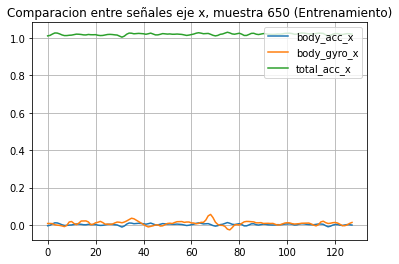

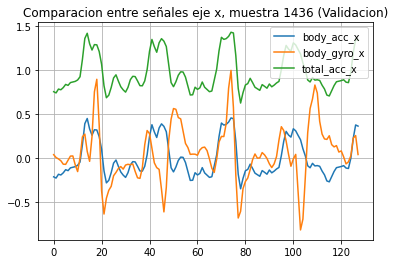

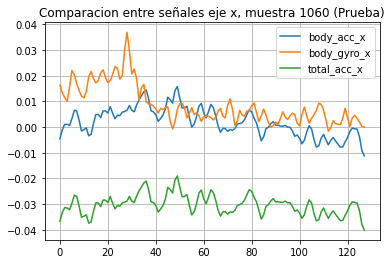

In [32]:
a = random.randint(0, 2799)
plt.plot(x,Entrena1.iloc[a],label='body_acc_x')
plt.plot(x,Entrena4.iloc[a],label='body_gyro_x')
plt.plot(x,Entrena7.iloc[a],label='total_acc_x')
plt.title('Comparacion entre señales eje x, muestra '+str(a)+' (Entrenamiento)')
plt.legend(loc='upper right')
plt.grid()
plt.show()

b = random.randint(0, 1999)
plt.plot(x,Vali1.iloc[b],label='body_acc_x')
plt.plot(x,Vali4.iloc[b],label='body_gyro_x')
plt.plot(x,Vali7.iloc[b],label='total_acc_x')
plt.title('Comparacion entre señales eje x, muestra '+str(b)+' (Validacion)')
plt.legend(loc='upper right')
plt.grid()
plt.show()

c = random.randint(0, 1999)
plt.plot(x,Prueba1.iloc[c],label='body_acc_x')
plt.plot(x,Prueba4.iloc[c],label='body_gyro_x')
plt.plot(x,Prueba7.iloc[c],label='total_acc_x')
plt.title('Comparacion entre señales eje x, muestra '+str(c)+' (Prueba)')
plt.legend(loc='upper right')
plt.grid()
plt.show()

### Comparación de señales en el eje y (1 muestra por conjunto)

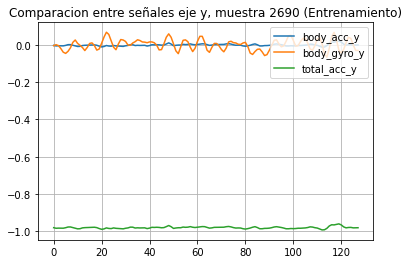

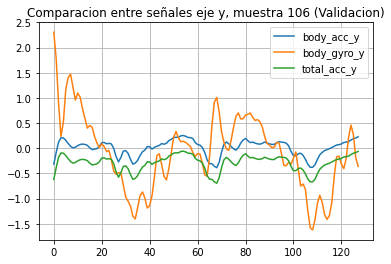

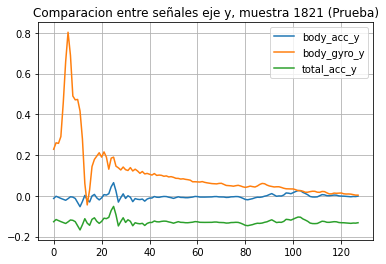

In [33]:
a = random.randint(0, 2799)
plt.plot(x,Entrena2.iloc[a],label='body_acc_y')
plt.plot(x,Entrena5.iloc[a],label='body_gyro_y')
plt.plot(x,Entrena8.iloc[a],label='total_acc_y')
plt.title('Comparacion entre señales eje y, muestra '+str(a)+' (Entrenamiento)')
plt.legend(loc='upper right')
plt.grid()
plt.show()

b = random.randint(0, 1999)
plt.plot(x,Vali2.iloc[b],label='body_acc_y')
plt.plot(x,Vali5.iloc[b],label='body_gyro_y')
plt.plot(x,Vali8.iloc[b],label='total_acc_y')
plt.title('Comparacion entre señales eje y, muestra '+str(b)+' (Validacion)')
plt.legend(loc='upper right')
plt.grid()
plt.show()

c = random.randint(0, 1999)
plt.plot(x,Prueba2.iloc[c],label='body_acc_y')
plt.plot(x,Prueba5.iloc[c],label='body_gyro_y')
plt.plot(x,Prueba8.iloc[c],label='total_acc_y')
plt.title('Comparacion entre señales eje y, muestra '+str(c)+' (Prueba)')
plt.legend(loc='upper right')
plt.grid()
plt.show()

### Comparación de señales en el eje z (1 muestra por conjunto)

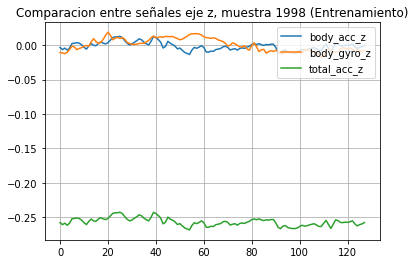

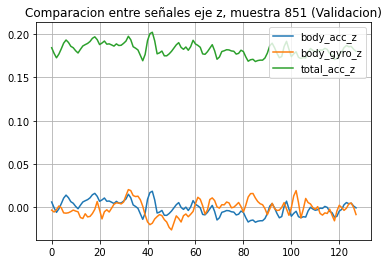

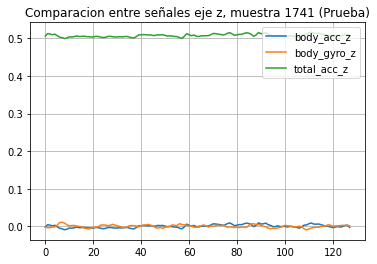

In [34]:
a = random.randint(0, 2799)
plt.plot(x,Entrena3.iloc[a],label='body_acc_z')
plt.plot(x,Entrena6.iloc[a],label='body_gyro_z')
plt.plot(x,Entrena9.iloc[a],label='total_acc_z')
plt.title('Comparacion entre señales eje z, muestra '+str(a)+' (Entrenamiento)')
plt.legend(loc='upper right')
plt.grid()
plt.show()

b = random.randint(0, 1999)
plt.plot(x,Vali3.iloc[b],label='body_acc_z')
plt.plot(x,Vali6.iloc[b],label='body_gyro_z')
plt.plot(x,Vali9.iloc[b],label='total_acc_z')
plt.title('Comparacion entre señales eje z, muestra '+str(b)+' (Validacion)')
plt.legend(loc='upper right')
plt.grid()
plt.show()

c = random.randint(0, 1999)
plt.plot(x,Prueba3.iloc[c],label='body_acc_z')
plt.plot(x,Prueba6.iloc[c],label='body_gyro_z')
plt.plot(x,Prueba9.iloc[c],label='total_acc_z')
plt.title('Comparacion entre señales eje z, muestra '+str(c)+' (Prueba)')
plt.legend(loc='upper right')
plt.grid()
plt.show()

## **Creación de dataframes**

### Dataframe de entrenamiento

In [35]:
#En este vector se guardan las señales con las que se va a trabajar
aux_Entrena = [Entrena4, Entrena5, Entrena6, Entrena7, Entrena8, Entrena9]
#Calculo de caracteristicas

#Promedio
M = []
for j in range(len(aux_Entrena)):
  N = []
  for i in range(Entrena1.shape[0]):
      N.append(aux_Entrena[j].iloc[i].mean())
  M.append(N)

#Desviacion estandar
M1 = []
for j in range(len(aux_Entrena)):
  N = []
  for i in range(Entrena1.shape[0]):
      N.append(aux_Entrena[j].iloc[i].std())
  M1.append(N)

#Maximo
M2 = []
for j in range(len(aux_Entrena)):
  N = []
  for i in range(Entrena1.shape[0]):
      N.append(aux_Entrena[j].iloc[i].max())
  M2.append(N)

#Minimo
M3 = []
for j in range(len(aux_Entrena)):
  N = []
  for i in range(Entrena1.shape[0]):
      N.append(aux_Entrena[j].iloc[i].min())
  M3.append(N)

#Peak to Peak
M4 = []
for j in range(len(aux_Entrena)):
  N = []
  for i in range(Entrena1.shape[0]):
      N.append(aux_Entrena[j].iloc[i].max()-aux_Entrena[j].iloc[i].min())
  M4.append(N)

#interquartile range
M7 = []
for j in range(len(aux_Entrena)):
  N = []
  for i in range(Entrena1.shape[0]):
      N.append(scipy.stats.iqr(aux_Entrena[j].iloc[i].to_numpy()))
  M7.append(N)

#Entropy
M8 = []
for j in range(len(aux_Entrena)):
  N = []
  for i in range(Entrena1.shape[0]):
    hist = np.histogram(aux_Entrena[j].iloc[i], bins=50)
    hist_norm = hist[0]/128
    N.append(scipy.stats.entropy(hist_norm, base=2)/50)
  M8.append(N)

prom = np.array(M)
prom = pd.DataFrame(prom)

std = np.array(M1)
std = pd.DataFrame(std)

max = np.array(M2)
max = pd.DataFrame(max)

min = np.array(M3)
min = pd.DataFrame(min)

ptp = np.array(M4)
ptp = pd.DataFrame(ptp)

iqr = np.array(M7)
iqr = pd.DataFrame(iqr)

ent = np.array(M8)
ent = pd.DataFrame(ent)

Entrena = pd.concat([prom, std, max, min, ptp, iqr, ent], axis=0)

nombres = ['Prom_bgx', 'Prom_bgy', 'Prom_bgz', 'Prom_tax', 'Prom_tay', 'Prom_taz',
           'Std_bgx', 'Std_bgy', 'Std_bgz', 'Std_tax', 'Std_tay', 'Std_taz',
           'Max_bgx', 'Max_bgy', 'Max_bgz', 'Max_tax', 'Max_tay', 'Max_taz',
           'Min_bgx', 'Min_bgy', 'Min_bgz', 'Min_tax', 'Min_tay', 'Min_taz',
           'Ptp_bgx', 'Ptp_bgy', 'Ptp_bgz', 'Ptp_tax', 'Ptp_tay', 'Ptp_taz',
           'Iqr_bgx', 'Iqr_bgy', 'Iqr_bgz', 'Iqr_tax', 'Iqr_tay', 'Iqr_taz',
           'Ent_bgx', 'Ent_bgy', 'Ent_bgz', 'Ent_tax', 'Ent_tay', 'Ent_taz']

Entrena = Entrena.transpose()
Entrena.columns = nombres
Entrena

,Prom_bgx,Prom_bgy,Prom_bgz,Prom_tax,Prom_tay,Prom_taz,Std_bgx,Std_bgy,Std_bgz,Std_tax,Std_tay,Std_taz,Max_bgx,Max_bgy,Max_bgz,Max_tax,Max_tay,Max_taz,Min_bgx,Min_bgy,Min_bgz,Min_tax,Min_tay,Min_taz,Ptp_bgx,Ptp_bgy,Ptp_bgz,Ptp_tax,Ptp_tay,Ptp_taz,Iqr_bgx,Iqr_bgy,Iqr_bgz,Iqr_tax,Iqr_tay,Iqr_taz,Ent_bgx,Ent_bgy,Ent_bgz,Ent_tax,Ent_tay,Ent_taz
0,0.000348,-0.000070,0.000386,0.025078,0.901734,0.432918,0.012388,0.019155,0.004518,0.004227,0.003928,0.006018,0.030318,0.042568,0.015195,0.036805,0.916662,0.444934,-0.016892,-0.042701,-0.011083,0.016784,0.891605,0.421124,0.047210,0.085269,0.026278,0.020022,0.025057,0.023809,0.018608,0.031758,0.005285,0.006617,0.005940,0.009458,0.097795,0.098681,0.096463,0.101610,0.093403,0.106434
1,0.056386,0.008325,-0.013427,1.020849,-0.042960,0.106208,0.145705,0.023190,0.039123,0.004057,0.034634,0.012607,0.359272,0.059152,0.088674,1.033099,0.027643,0.132113,-0.233842,-0.047379,-0.102912,1.010061,-0.114799,0.075806,0.593114,0.106531,0.191586,0.023038,0.142442,0.056307,0.238639,0.031086,0.052255,0.005048,0.050301,0.017467,0.098345,0.099364,0.100147,0.095653,0.103195,0.101588
2,-0.391818,0.208210,0.124260,0.850377,-0.424381,-0.312032,0.425287,0.617308,0.508107,0.261527,0.182298,0.144404,0.530688,1.426500,1.827373,1.479161,-0.076591,-0.020923,-1.646900,-1.297600,-0.699681,0.246993,-1.012427,-0.698262,2.177588,2.724100,2.527054,1.232168,0.935836,0.677339,0.553310,0.892848,0.673053,0.339246,0.267512,0.148964,0.100554,0.102240,0.099171,0.100360,0.098446,0.098967
3,-0.004536,0.000905,-0.022038,0.033804,0.958202,0.294047,0.005272,0.016987,0.007546,0.003624,0.002752,0.004286,0.018351,0.051043,0.005139,0.045282,0.965071,0.309703,-0.015111,-0.055484,-0.037037,0.024174,0.950852,0.283310,0.033462,0.106527,0.042176,0.021108,0.014219,0.026394,0.004541,0.018986,0.008745,0.003808,0.003305,0.005770,0.087868,0.095275,0.096365,0.095353,0.097063,0.096774
4,-0.013950,-0.010189,-0.015971,0.067218,0.978764,-0.212383,0.019710,0.046858,0.029248,0.012309,0.011195,0.010187,0.038181,0.144186,0.042245,0.091929,1.012053,-0.170225,-0.074370,-0.137671,-0.126870,0.024229,0.941198,-0.242207,0.112551,0.281857,0.169115,0.067700,0.070855,0.071982,0.023519,0.040206,0.035369,0.016576,0.012135,0.010761,0.097067,0.091764,0.092695,0.097092,0.093752,0.089783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,-0.005401,0.011615,-0.004928,0.968332,-0.340410,0.168761,0.013842,0.017438,0.013331,0.003392,0.006755,0.011837,0.032370,0.048150,0.055263,0.981297,-0.323045,0.190479,-0.033633,-0.065113,-0.041429,0.958167,-0.354454,0.144456,0.066004,0.113263,0.096692,0.023130,0.031409,0.046023,0.014366,0.021580,0.015189,0.003247,0.010239,0.022676,0.099276,0.091546,0.088608,0.091465,0.100962,0.101262
2796,0.010627,-0.018463,-0.003047,0.994127,-0.209058,0.094420,0.441451,0.402109,0.284145,0.252707,0.174358,0.123813,0.921821,0.725374,0.614627,1.685164,0.096603,0.357435,-1.081569,-0.728946,-0.612313,0.500015,-0.856978,-0.088421,2.003390,1.454319,1.226940,1.185149,0.953581,0.445856,0.613963,0.722158,0.443633,0.308994,0.190159,0.162985,0.101401,0.103510,0.104032,0.100425,0.095163,0.103200
2797,0.000387,-0.000995,0.000555,1.001068,0.105390,0.193107,0.005413,0.006348,0.004448,0.002300,0.004025,0.005488,0.015573,0.014238,0.012131,1.009001,0.121572,0.206670,-0.012414,-0.017191,-0.008702,0.994888,0.093890,0.179773,0.027987,0.031429,0.020833,0.014113,0.027682,0.026897,0.006282,0.008599,0.006372,0.002933,0.005662,0.007723,0.096991,0.100561,0.100586,0.096172,0.091974,0.100835
2798,-0.004577,-0.033746,-0.014148,0.944797,-0.280799,-0.312712,0.468169,0.379395,0.318746,0.195630,0.142802,0.145137,0.953941,0.638442,0.551952,1.527113,0.007563,-0.073996,-1.008885,-1.190982,-0.888906,0.628012,-0.596603,-0.737068,1.962826,1.829424,1.440858,0.899101,0.604166,0.663072,0.701780,0.529696,0.413645,0.215428,0.246821,0.175945,0.103340,0.099504,0.102859,0.097815,0.1040

### Dataframe de validación

In [36]:
#En este vector se guardan las señales con las que se va a trabajar
aux_Vali = [Vali4, Vali5, Vali6, Vali7, Vali8, Vali9]
#Calculo de caracteristicas

#Promedio
M = []
for j in range(len(aux_Vali)):
  N = []
  for i in range(Vali1.shape[0]):
      N.append(aux_Vali[j].iloc[i].mean())
  M.append(N)

#Desviacion estandar
M1 = []
for j in range(len(aux_Vali)):
  N = []
  for i in range(Vali1.shape[0]):
      N.append(aux_Vali[j].iloc[i].std())
  M1.append(N)

#Maximo
M2 = []
for j in range(len(aux_Vali)):
  N = []
  for i in range(Vali1.shape[0]):
      N.append(aux_Vali[j].iloc[i].max())
  M2.append(N)

#Minimo
M3 = []
for j in range(len(aux_Vali)):
  N = []
  for i in range(Vali1.shape[0]):
      N.append(aux_Vali[j].iloc[i].min())
  M3.append(N)

#Peak to Peak
M4 = []
for j in range(len(aux_Vali)):
  N = []
  for i in range(Vali1.shape[0]):
      N.append(aux_Vali[j].iloc[i].max()-aux_Vali[j].iloc[i].min())
  M4.append(N)

#interquartile range
M7 = []
for j in range(len(aux_Vali)):
  N = []
  for i in range(Vali1.shape[0]):
      N.append(scipy.stats.iqr(aux_Vali[j].iloc[i].to_numpy()))
  M7.append(N)

#Entropy
M8 = []
for j in range(len(aux_Vali)):
  N = []
  for i in range(Vali1.shape[0]):
    hist = np.histogram(aux_Vali[j].iloc[i], bins=50)
    hist_norm = hist[0]/128
    N.append(scipy.stats.entropy(hist_norm, base=2)/50)
  M8.append(N)

prom = np.array(M)
prom = pd.DataFrame(prom)

std = np.array(M1)
std = pd.DataFrame(std)

max = np.array(M2)
max = pd.DataFrame(max)

min = np.array(M3)
min = pd.DataFrame(min)

ptp = np.array(M4)
ptp = pd.DataFrame(ptp)

iqr = np.array(M7)
iqr = pd.DataFrame(iqr)

ent = np.array(M8)
ent = pd.DataFrame(ent)

Vali = pd.concat([prom, std, max, min, ptp, iqr, ent], axis=0)

Vali = Vali.transpose()
Vali.columns = nombres
Vali

,Prom_bgx,Prom_bgy,Prom_bgz,Prom_tax,Prom_tay,Prom_taz,Std_bgx,Std_bgy,Std_bgz,Std_tax,Std_tay,Std_taz,Max_bgx,Max_bgy,Max_bgz,Max_tax,Max_tay,Max_taz,Min_bgx,Min_bgy,Min_bgz,Min_tax,Min_tay,Min_taz,Ptp_bgx,Ptp_bgy,Ptp_bgz,Ptp_tax,Ptp_tay,Ptp_taz,Iqr_bgx,Iqr_bgy,Iqr_bgz,Iqr_tax,Iqr_tay,Iqr_taz,Ent_bgx,Ent_bgy,Ent_bgz,Ent_tax,Ent_tay,Ent_taz
0,-0.065498,-0.011346,0.020165,1.018081,-0.241166,-0.077553,0.682437,0.388072,0.270008,0.394732,0.181104,0.112663,1.136563,0.923212,0.831855,1.967108,0.138280,0.147474,-1.438735,-1.625284,-0.637756,0.326683,-0.715920,-0.452874,2.575298,2.548496,1.469611,1.640425,0.854200,0.600348,1.240652,0.463496,0.391232,0.677909,0.216840,0.159890,0.103297,0.091508,0.099249,0.099638,0.099243,0.095807
1,-0.444008,0.160206,0.082939,0.943599,-0.368223,-0.141530,0.386106,0.295065,0.271062,0.255020,0.180188,0.128176,0.358289,0.890704,0.987526,1.525599,-0.084345,0.162267,-1.261458,-0.645169,-0.549264,0.408656,-0.871973,-0.320579,1.619747,1.535873,1.536790,1.116943,0.787627,0.482846,0.578392,0.331203,0.277923,0.271198,0.214765,0.222771,0.104565,0.099471,0.095831,0.100542,0.100054,0.098491
2,-0.208442,0.042222,0.058766,0.969253,-0.097888,-0.274368,0.309399,0.371054,0.251462,0.212603,0.086877,0.126580,0.465989,1.868497,0.565500,1.874181,0.028536,-0.036153,-0.901373,-0.895348,-0.660816,0.644406,-0.434889,-0.873732,1.367362,2.763845,1.226316,1.229775,0.463425,0.837579,0.446641,0.364806,0.363878,0.181529,0.094202,0.104365,0.104504,0.087548,0.099871,0.091870,0.092706,0.086438
3,-0.002067,-0.000193,0.000260,1.018352,-0.155064,0.073520,0.012875,0.005037,0.008541,0.002394,0.003925,0.005257,0.037666,0.018044,0.015612,1.022988,-0.145267,0.093647,-0.023319,-0.016748,-0.022447,1.012396,-0.164702,0.059447,0.060985,0.034792,0.038059,0.010592,0.019435,0.034200,0.014405,0.005655,0.012063,0.003300,0.004621,0.006015,0.097204,0.091914,0.102952,0.101584,0.099429,0.092830
4,0.164290,-0.048740,-0.032690,0.993886,-0.190528,-0.140307,0.359453,0.273752,0.383503,0.229237,0.156754,0.132261,0.880156,0.511489,0.719530,1.497994,0.179241,0.139880,-0.679109,-0.756708,-0.688280,0.679089,-0.557522,-0.484470,1.559264,1.268197,1.407810,0.818905,0.736763,0.624350,0.575619,0.331119,0.636912,0.339852,0.187799,0.183586,0.100446,0.102873,0.105689,0.103699,0.103441,0.102384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.038874,0.028656,0.031136,0.984672,-0.278019,-0.156583,0.506859,0.403304,0.326098,0.244507,0.165930,0.118919,0.889881,0.752926,0.730644,1.649974,0.048926,0.194979,-0.906078,-0.817892,-0.725466,0.610456,-0.713228,-0.480393,1.795960,1.570818,1.456110,1.039518,0.762154,0.675372,0.912208,0.551129,0.514239,0.374166,0.240846,0.125201,0.106508,0.103775,0.100331,0.101216,0.103560,0.096550
1996,-0.087613,0.027596,-0.000004,0.984560,-0.281641,-0.115265,0.640887,0.547453,0.404356,0.323439,0.188059,0.135346,1.228244,1.448815,0.789755,1.930545,0.060045,0.128144,-1.730218,-1.461734,-1.072588,0.537880,-0.864595,-0.538624,2.958462,2.910549,1.862343,1.392664,0.924640,0.666768,0.763633,0.559344,0.513641,0.433862,0.204768,0.192976,0.100649,0.098822,0.102515,0.097605,0.099810,0.099661
1997,-0.091972,-0.009795,-0.088964,1.026505,-0.047814,-0.060142,0.063932,0.057512,0.063365,0.007704,0.017683,0.027689,-0.003270,0.147497,0.008047,1.053921,-0.011954,-0.016971,-0.219823,-0.191317,-0.239969,1.007265,-0.078506,-0.107043,0.216553,0.338815,0.248016,0.046656,0.066553,0.090072,0.103600,0.084513,0.084494,0.008754,0.030225,0.051862,0.104113,0.094361,0.101402,0.096661,0.105742,0.102824
1998,0.012731,-0.004174,0.017816,1.000961,0.112216,0.187317,0.007326,0.008063,0.006713,0.002427,0.003909,0.007075,0.029604,0.013238,0.033433,1.010358,0.123927,0.213650,-0.003183,-0.022725,0.002078,0.993499,0.100502,0.172270,0.032787,0.035963,0.031355,0.016859,0.023424,0.041379,0.009078,0.012298,0.009544,0.002763,0.004112,0.008418,0.102392,0.101907,0.101072,0.0

### Dataframe de Prueba

In [37]:
#En este vector se guardan las señales con las que se va a trabajar
aux_Prueba = [Prueba4, Prueba5, Prueba6, Prueba7, Prueba8, Prueba9]

#Calculo de caracteristicas

#Promedio
M = []
for j in range(len(aux_Prueba)):
  N = []
  for i in range(Prueba1.shape[0]):
      N.append(aux_Prueba[j].iloc[i].mean())
  M.append(N)

#Desviacion estandar
M1 = []
for j in range(len(aux_Prueba)):
  N = []
  for i in range(Prueba1.shape[0]):
      N.append(aux_Prueba[j].iloc[i].std())
  M1.append(N)

#Maximo
M2 = []
for j in range(len(aux_Prueba)):
  N = []
  for i in range(Prueba1.shape[0]):
      N.append(aux_Prueba[j].iloc[i].max())
  M2.append(N)

#Minimo
M3 = []
for j in range(len(aux_Prueba)):
  N = []
  for i in range(Prueba1.shape[0]):
      N.append(aux_Prueba[j].iloc[i].min())
  M3.append(N)

#Peak to Peak
M4 = []
for j in range(len(aux_Prueba)):
  N = []
  for i in range(Prueba1.shape[0]):
      N.append(aux_Prueba[j].iloc[i].max()-aux_Prueba[j].iloc[i].min())
  M4.append(N)

#interquartile range
M7 = []
for j in range(len(aux_Prueba)):
  N = []
  for i in range(Prueba1.shape[0]):
      N.append(scipy.stats.iqr(aux_Prueba[j].iloc[i].to_numpy()))
  M7.append(N)

#Entropy
M8 = []
for j in range(len(aux_Vali)):
  N = []
  for i in range(Vali1.shape[0]):
    hist = np.histogram(aux_Vali[j].iloc[i], bins=50)
    hist_norm = hist[0]/128
    N.append(scipy.stats.entropy(hist_norm, base=2)/50)
  M8.append(N)

prom = np.array(M)
prom = pd.DataFrame(prom)

std = np.array(M1)
std = pd.DataFrame(std)

max = np.array(M2)
max = pd.DataFrame(max)

min = np.array(M3)
min = pd.DataFrame(min)

ptp = np.array(M4)
ptp = pd.DataFrame(ptp)

iqr = np.array(M7)
iqr = pd.DataFrame(iqr)

ent = np.array(M8)
ent = pd.DataFrame(ent)

Prueba = pd.concat([prom, std, max, min, ptp, iqr, ent], axis=0)

Prueba = Prueba.transpose()
Prueba.columns = nombres
Prueba

,Prom_bgx,Prom_bgy,Prom_bgz,Prom_tax,Prom_tay,Prom_taz,Std_bgx,Std_bgy,Std_bgz,Std_tax,Std_tay,Std_taz,Max_bgx,Max_bgy,Max_bgz,Max_tax,Max_tay,Max_taz,Min_bgx,Min_bgy,Min_bgz,Min_tax,Min_tay,Min_taz,Ptp_bgx,Ptp_bgy,Ptp_bgz,Ptp_tax,Ptp_tay,Ptp_taz,Iqr_bgx,Iqr_bgy,Iqr_bgz,Iqr_tax,Iqr_tay,Iqr_taz,Ent_bgx,Ent_bgy,Ent_bgz,Ent_tax,Ent_tay,Ent_taz
0,0.000344,-0.006995,0.000702,0.946931,0.109466,0.367099,0.026442,0.064720,0.033161,0.017541,0.016611,0.018362,0.057101,0.312133,0.119203,1.001531,0.158522,0.417015,-0.113425,-0.174193,-0.060396,0.855802,0.043180,0.323398,0.170526,0.486326,0.179599,0.145729,0.115343,0.093617,0.031230,0.075103,0.030333,0.013063,0.014604,0.020723,0.103297,0.091508,0.099249,0.099638,0.099243,0.095807
1,0.000451,-0.002710,0.000772,1.016344,0.082989,-0.111173,0.002738,0.004563,0.003080,0.002158,0.002425,0.004189,0.006979,0.007094,0.007941,1.020621,0.088454,-0.102025,-0.006937,-0.013801,-0.005532,1.011763,0.076528,-0.122084,0.013916,0.020895,0.013472,0.008858,0.011926,0.020059,0.004198,0.006132,0.004664,0.003269,0.003328,0.005313,0.104565,0.099471,0.095831,0.100542,0.100054,0.098491
2,0.166188,-0.053896,-0.040861,0.988499,-0.269053,-0.135100,0.532580,0.413129,0.314119,0.225906,0.184255,0.122713,1.266269,1.050328,0.627785,1.628010,0.018915,0.183772,-0.821517,-1.078917,-0.738497,0.635000,-0.769573,-0.372439,2.087786,2.129245,1.366283,0.993010,0.788488,0.556211,0.844227,0.460733,0.520541,0.343083,0.208721,0.160971,0.104504,0.087548,0.099871,0.091870,0.092706,0.086438
3,-0.000076,0.000178,-0.001889,-0.038081,0.978829,0.226521,0.007795,0.008291,0.005272,0.002131,0.004560,0.005048,0.026566,0.024554,0.007250,-0.032911,0.993127,0.238014,-0.016495,-0.033549,-0.014000,-0.042676,0.966732,0.215479,0.043061,0.058103,0.021250,0.009765,0.026394,0.022535,0.008057,0.008520,0.007818,0.003501,0.005459,0.007069,0.097204,0.091914,0.102952,0.101584,0.099429,0.092830
4,0.020040,0.009814,-0.010000,0.996040,-0.265067,-0.067879,0.631314,0.489937,0.412720,0.315788,0.214496,0.143947,0.972260,1.377216,0.905617,1.696303,0.025686,0.283949,-1.510481,-0.842532,-0.956879,0.408217,-1.118795,-0.502313,2.482741,2.219748,1.862496,1.288086,1.144481,0.786262,0.913205,0.721603,0.606111,0.516229,0.192085,0.174972,0.100446,0.102873,0.105689,0.103699,0.103441,0.102384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.009918,-0.002357,0.004965,1.008875,-0.210640,0.077941,0.077608,0.017621,0.026081,0.005309,0.023121,0.010233,0.453307,0.077575,0.146601,1.038292,-0.076315,0.107122,-0.209085,-0.082995,-0.063336,0.984619,-0.299125,0.036694,0.662392,0.160571,0.209937,0.053673,0.222810,0.070428,0.015929,0.012924,0.020266,0.003917,0.009173,0.011835,0.106508,0.103775,0.100331,0.101216,0.103560,0.096550
1996,0.475408,-0.073761,0.024598,1.015125,-0.092308,0.048272,0.452748,0.424978,0.332623,0.460042,0.191990,0.114475,1.604303,0.913837,0.984935,2.043897,0.506772,0.276217,-0.794670,-0.979554,-0.725936,0.213437,-0.605266,-0.286493,2.398973,1.893391,1.710871,1.830460,1.112038,0.562709,0.508319,0.566887,0.437557,0.641524,0.205273,0.161216,0.100649,0.098822,0.102515,0.097605,0.099810,0.099661
1997,-0.021383,-0.074422,0.071132,0.928696,0.167872,0.374947,0.006727,0.020867,0.017261,0.002649,0.002916,0.003498,-0.007325,-0.030490,0.094434,0.935882,0.175965,0.384406,-0.037252,-0.119905,0.033426,0.923076,0.159840,0.365920,0.029928,0.089416,0.061007,0.012806,0.016125,0.018486,0.010446,0.038684,0.027764,0.003768,0.004076,0.004133,0.104113,0.094361,0.101402,0.096661,0.105742,0.102824
1998,0.196036,0.022591,0.071215,0.959922,-0.307374,-0.198853,0.122823,0.203751,0.102220,0.043290,0.031593,0.035276,0.436716,0.690178,0.474201,1.041798,-0.112428,-0.104647,-0.185920,-0.483881,-0.156138,0.640800,-0.390518,-0.262474,0.622636,1.174060,0.630339,0.400998,0.278090,0.157827,0.223191,0.188469,0.089938,0.023107,0.024543,0.042033,0.102392,0.101907,0.101072,0.091909,0.0947

## **Normalización de caracteristicas**

In [38]:
#Normalizacion de caracteristicas
scaler = sklearn.preprocessing.StandardScaler()

scaler.fit(Entrena)

S_Entrena = scaler.transform(Entrena)
S_Vali = scaler.transform(Vali)
S_Prueba = scaler.transform(Prueba)

#Concatenamos conjunto de entrenamiento y validacion para que lo use el grid
Entrena_Vali = np.concatenate([S_Entrena, S_Vali])
Entrena_Vali_class = np.concatenate([labels_entrena, labels_vali])

#Vemos que indices del conjunto Entrena_Vali pertenecen al conjunto de entrenamiento
index = np.zeros(Entrena.shape[0]+Vali.shape[0])
for i in range(Entrena.shape[0]):
  index[i] = -1

#Definimos el predifinedSplit
ps = sklearn.model_selection.PredefinedSplit(index)


## **PCA y DBSCAN**

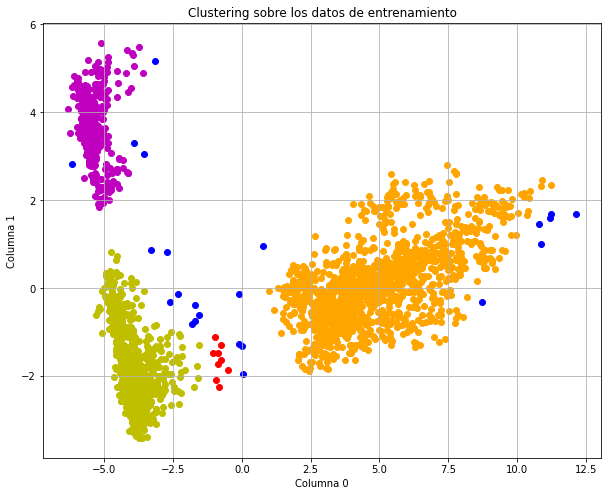

In [39]:
#Creación del PCA
pca_Entrena = PCA(n_components=2).fit_transform(S_Entrena)

#DBSCAN
dbscan_cluster = DBSCAN().fit(pca_Entrena) 
pred_cluster = np.array(dbscan_cluster.labels_).astype(int) 
n_clusters = set(pred_cluster)

#Grafico de clustering
plt.figure(figsize=(10, 8))
for i in range(0,len(pred_cluster)):
  if pred_cluster[i] == 0:
    plt.scatter(pca_Entrena[i,0],pca_Entrena[i,1], label='Muestras PCA',color='m')
  elif pred_cluster[i] == 1:
    plt.scatter(pca_Entrena[i,0],pca_Entrena[i,1], label='Muestras PCA',color='y')
  elif pred_cluster[i] == 2:
    plt.scatter(pca_Entrena[i,0],pca_Entrena[i,1], label='Muestras PCA',color='orange')
  elif pred_cluster[i] == 3:
    plt.scatter(pca_Entrena[i,0],pca_Entrena[i,1], label='Muestras PCA',color='r')
  elif pred_cluster[i] == 4:
    plt.scatter(pca_Entrena[i,0],pca_Entrena[i,1], label='Muestras PCA',color='green')
  else:
    plt.scatter(pca_Entrena[i,0],pca_Entrena[i,1], label='Muestras PCA',color='b')
plt.xlabel('Columna 0')
plt.ylabel('Columna 1')
plt.title('Clustering sobre los datos de entrenamiento')
plt.grid()
plt.show()

## **Random Forest**

In [40]:
#Random Forest que trabaja con todas las caracteristicas

#Mediante un random forest
Forest = sklearn.ensemble.RandomForestClassifier()
#Definimos una grilla para seleccionar los hiperparametros
GridForest = sklearn.model_selection.GridSearchCV(Forest, param_grid = {'n_estimators' : [150, 175, 200, 225, 250],
                                                                        'max_depth' : [15]}, cv=ps)

GridForest.fit(Entrena_Vali, Entrena_Vali_class)

param_Forest = GridForest.best_params_
print('Los mejores parametros antes de reducir caracteristicas son: '+str(param_Forest))
#Obtenemos el mejor estimador
estim_Forest = GridForest.best_estimator_

#Vemos la clasificacion del estimador sobre el conjunto de validacion
predi_vali_Forest = estim_Forest.predict(S_Vali)

#Accuracy del clasificador
accuracy_Forest = sklearn.metrics.accuracy_score(labels_vali, predi_vali_Forest)
print('El accuracy sin reducir caracteristicas es (Validacion): '+str(accuracy_Forest))

predi_test_Forest = estim_Forest.predict(S_Prueba)

print('Los labels predichos sobre el conjunto de prueba al no reducir caracteristicas son:')
print(predi_test_Forest)

#Obtenemos la matriz de confusión en el conjunto de validacion
Confu = sklearn.metrics.confusion_matrix(labels_vali, predi_vali_Forest, normalize='true')

print('')
print('------------------------------------------------')
print('')
#-------------------------------------------------------------------------------
#Hacemos el modelo con el que buscaremos reducir caracteristicas
model_Forest = sklearn.feature_selection.SelectFromModel(estim_Forest)

#Entrenamos el model con el conjunto de entrenamiento
model_Forest.fit(S_Entrena, labels_entrena)

#Obtenemos las caracteristicas seleccionadas
caracte_Forest = model_Forest.get_support(indices=False)

#Recorremos la lista de caracteristicas seleccionadas y las añadimos a una lista donde se consideran
#solo a las caracteristicas seleccionadas
select_carac_Forest = []
for i in range(len(caracte_Forest)):
  if caracte_Forest[i] == True:
    select_carac_Forest.append(nombres[i])
print('Se seleccionaron '+str(len(select_carac_Forest))+' caracteristicas')
print('Las caracteristicas seleccionadas son: '+str(select_carac_Forest))

#Obtenemos los distintos conjuntos con las caracteristicas reducidas
Entrena_Vali_redu_Forest = model_Forest.transform(Entrena_Vali) #<--- Entrenamiento y validacion concatenados
Vali_redu_Forest = model_Forest.transform(S_Vali) #<----- Conjunto de validacion
Test_redu_Forest = model_Forest.transform(S_Prueba) #<----- Conjunto de prueba

#-------------------------------------------------------------------------------

#RandomForest que trabaja con las caracteristicas reducidas
Forest1 = sklearn.ensemble.RandomForestClassifier()

#Definimos una grilla para seleccionar los hiperparametros
GridForest1 = sklearn.model_selection.GridSearchCV(Forest1, param_grid = {'n_estimators' : [150, 175, 200, 225, 250],
                                                                          'max_depth' : [15]}, cv=ps) 

GridForest1.fit(Entrena_Vali_redu_Forest, Entrena_Vali_class)

param_Forest1 = GridForest1.best_params_
print('Los mejores parametros al reducir caracteristicas son: '+str(param_Forest1))
#Obtenemos el mejor estimador
estim_Forest1 = GridForest1.best_estimator_

#Vemos la clasificacion del estimador sobre el conjunto de validacion
predi_vali_Forest1 = estim_Forest1.predict(Vali_redu_Forest)

#Accuracy del clasificador
accuracy_Forest1 = sklearn.metrics.accuracy_score(labels_vali, predi_vali_Forest1)
print('El accuracy al reducir caracteristicas es (validacion): '+str(accuracy_Forest1))

predi_test_Forest1 = estim_Forest1.predict(Test_redu_Forest)

print('Los labels predichos sobre el conjunto de prueba al reducir caracteristicas son:')
print(predi_test_Forest1)


#Obtenemos la matriz de confusión en el conjunto de validacion
Confu1 = sklearn.metrics.confusion_matrix(labels_vali, predi_vali_Forest1, normalize='true')

Los mejores parametros antes de reducir caracteristicas son: {'max_depth': 15, 'n_estimators': 150}
El accuracy sin reducir caracteristicas es (Validacion): 1.0
Los labels predichos sobre el conjunto de prueba al no reducir caracteristicas son:
[3 3 1 ... 3 4 4]

------------------------------------------------

Se seleccionaron 13 caracteristicas
Las caracteristicas seleccionadas son: ['Prom_tax', 'Prom_tay', 'Prom_taz', 'Std_tax', 'Max_tax', 'Max_tay', 'Min_tax', 'Min_tay', 'Ptp_tax', 'Ptp_tay', 'Iqr_bgz', 'Iqr_tax', 'Iqr_tay']
Los mejores parametros al reducir caracteristicas son: {'max_depth': 15, 'n_estimators': 250}
El accuracy al reducir caracteristicas es (validacion): 0.999
Los labels predichos sobre el conjunto de prueba al reducir caracteristicas son:
[3 3 0 ... 3 4 4]


Matriz de confusion al usar todas las caracteristicas (Validacion)


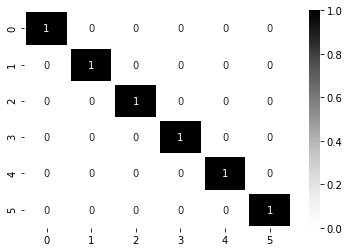

In [41]:
print('Matriz de confusion al usar todas las caracteristicas (Validacion)')
sns.heatmap(Confu, linewidths=3, annot=True, cmap="Greys")

Matriz de confusion al reducir caracteristicas (Validacion)


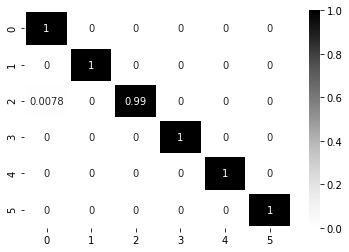

In [42]:
print('Matriz de confusion al reducir caracteristicas (Validacion)')
sns.heatmap(Confu1, linewidths=3, annot=True, cmap="Greys")

In [43]:
#Creacion del csv para subir guardar los resultados de la prediccion realizada
id = []
for i in range(len(predi_test_Forest1)+1):
  if i == 0:
    id.append('Id')
  else:
    id.append(i-1)

#Accuracy en validacion es mayor o igual con todas las características
if accuracy_Forest >= accuracy_Forest1: 
  Resultados_Test_Forest = np.array(['Category'])
  Resultados_Test_Forest = np.append(Resultados_Test_Forest, predi_test_Forest+1)

  final = np.array([id,Resultados_Test_Forest])
  final = np.transpose(final)

  #Aca guardamos los resultados de la predicción hecha al reducir caracteristicas
  myFile = open('ResultadosRF.csv', 'w')
  with myFile:
      writer = csv.writer(myFile)
      writer.writerows(final)
  print('Los labels de prueba se obtuvieron con todas las caracteristicas')

#Accuracy en validacion es mayor con las características reducidas
else: 
  Resultados_Test_Forest1 = np.array(['Category'])
  Resultados_Test_Forest1 = np.append(Resultados_Test_Forest1, predi_test_Forest1+1)

  final = np.array([id,Resultados_Test_Forest1])
  final = np.transpose(final)

  #Aca guardamos los resultados de la predicción hecha al reducir caracteristicas
  myFile = open('ResultadosRF.csv', 'w')
  with myFile:
      writer = csv.writer(myFile)
      writer.writerows(final)
  print('Los labels de prueba se obtuvieron con las caracteristicas reducidas')

res = pd.read_csv('ResultadosRF.csv')
res

Los labels de prueba se obtuvieron con todas las caracteristicas


,Id,Category
0,0,4
1,1,4
2,2,2
3,3,6
4,4,1
...,...,...
1995,1995,5
1996,1996,3
1997,1997,4
1998,1998,5


## **Red Neuronal**

### Creacion de dataloaders

In [44]:
#Dataloader de entrenamiento y validación
dataset_Entrena_Vali_Concat = []

for i in range(Entrena1.shape[0]):
  M = []
  for j in range(len(aux_Entrena)):
    M.append(aux_Entrena[j].iloc[i].astype(np.float32))
  dataset_Entrena_Vali_Concat.append({"signal": np.array(M), "label": labels_entrena[i]})

for i in range(Vali1.shape[0]):
  M = []
  for j in range(len(aux_Vali)):
    M.append(aux_Vali[j].iloc[i].astype(np.float32))
  dataset_Entrena_Vali_Concat.append({"signal": np.array(M), "label": labels_vali[i]})

#85% sera parte del conjunto de entrenamiento y el 15% restante sera de validacion
n_train = int(len(dataset_Entrena_Vali_Concat)*0.85)
n_val = len(dataset_Entrena_Vali_Concat) - n_train

dataset_train, dataset_vali = random_split(dataset_Entrena_Vali_Concat, [n_train, n_val])

dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=128, shuffle=True, num_workers=0)
dataloader_vali = torch.utils.data.DataLoader(dataset_vali, batch_size=128, shuffle=True, num_workers=0)


In [45]:
#Dataloader de prueba
dataset_Prueba = []

for i in range(Prueba1.shape[0]):
  M = []
  for j in range(len(aux_Prueba)):
    M.append(aux_Prueba[j].iloc[i].astype(np.float32))
  dataset_Prueba.append({"signal": np.array(M)})

dataloader_test = torch.utils.data.DataLoader(dataset_Prueba, batch_size=1, shuffle=False, num_workers=0)

### Creacion de la red

In [46]:
#Creamos el modelo de la red
model = nn.Sequential(
          nn.Conv1d(6, 40, 9),
          nn.ReLU(),
          nn.Conv1d(40, 40, 9),
          nn.Flatten(),
          nn.Linear(4480, 6))

device = torch.device('cuda')

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

### Entrenamiento 

Época 49, loss entrenamiento 0.079397, loss validacion 0.187367
El loss de validacion empezo a aumentar en la epoca 49
Por lo tanto nos quedaremos con la red de la epoca 39

Entrenamiento finalizado


Text(0.5, 1.0, 'Loss por epoca')

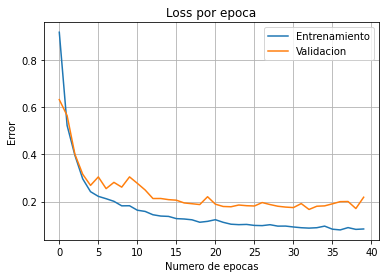

In [47]:
prom_loss_train = [] #Promedio de loss del entrenamiento para cada epoca
prom_loss_vali = [] #Promedio del loss de validacion para cada epoca
check = 10
epocas = range(check-1,1000,check)
prom_loss_train_def = [] #Promedio de loss cada 10 epocas (Entrenamiento)
prom_loss_vali_def = [] #Promedio loss cada 10 epocas (Validacion)
for epoch in range(1000):
    try:
      model.train()

      # Train on the current epoch
      loss_epoch_train = [] #Acá se guarda el loss de cada dato de la epoca
      for i, data in enumerate(dataloader_train, 0):
          inputs = data['signal'].to(device)
          labels = data["label"].to(device)

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = model(inputs)

          loss_train = criterion(outputs, labels) #calculo del loss de entrenamiento por dato
          loss_epoch_train.append(loss_train)     #guardamos el loss del dato en un vector
          loss_train.backward()                  
          optimizer.step()
      prom_train = sum(loss_epoch_train)/len(loss_epoch_train) #Calculamos el loss promedio de la epoca
      prom_loss_train.append(prom_train) #Guardamos el promedio en un vector

      # Compute validation loss and accuracy for current epoch
      model.eval()

      with torch.no_grad(): 
        loss_epoch_vali = [] #Acá se guarda el loss de cada dato de la epoca
        for i, data in enumerate(dataloader_vali, 0):
            inputs = data["signal"].to(device)
            labels = data["label"].to(device)

            outputs = model(inputs)
            # Calcular loss de validación
            loss_vali = criterion(outputs, labels) #calculo del loss de validación por dato
            loss_epoch_vali.append(loss_vali)      #guargamos el loss del dato en un vector
        prom_vali = sum(loss_epoch_vali)/len(loss_epoch_vali) #Calculamos el loss promedio de la epoca
        prom_loss_vali.append(prom_vali)
      
      # Imprimir: numero de época, loss de entrenamiento y loss de validación
      # Se debe usar sys.stdout.write() para que la línea de texto se sobreescriba en vez de imprimirse línea por línea
      # No se debe guardar checkpoints en cada época (guardarlos cada 10 épocas)
      
      sys.stdout.write("\rÉpoca %d, loss entrenamiento %f, loss validacion %f" % (epoch, prom_train, prom_vali))

      #Hacemos el checkpoint cada 10 epocas y revisamos si debemos interrumpir el entrenamiento
      if epoch in epocas: 
        torch.save(model, 'red'+str(epocas.index(epoch))+'.pt')
        s_train = 0 #Suma de los loss de las 10 epocas anteriores (entrenamiento)
        s_vali = 0 #Suma de los loss de las 10 epocas anteriores (validacion)
        for i in range(epoch-check,epoch):
          s_train = prom_loss_train[i]+s_train
          s_vali = prom_loss_vali[i]+s_vali
        prome_train = s_train/check #Loss promedio de las 10 epocas (Entrenamiento)
        prome_vali = s_vali/check #Loss promedio de las 10 epocas (Validacion)
        prom_loss_train_def.append(prome_train)
        prom_loss_vali_def.append(prome_vali)
        #Si el loss de validacion actual es mayor que el de la vez pasada termino
        #El entrenamiento
        if prom_loss_vali_def[len(prom_loss_vali_def)-1] > prom_loss_vali_def[len(prom_loss_vali_def)-2]:
          print('\nEl loss de validacion empezo a aumentar en la epoca '+str(epoch))
          print('Por lo tanto nos quedaremos con la red de la epoca '+str(epoch-check))
          model = torch.load('red'+str(epocas.index(epoch)-1)+'.pt') #Nos quedamos con la red anterior
          break

    except KeyboardInterrupt:
      print("\nEntrenamiento interrumpido")
      break

print('\nEntrenamiento finalizado')

#Grafico del loss por epoca
graf = len(prom_loss_train)-check #Esto es para graficar hasta el momento en que el loss fue minimo
plt.plot(range(graf), prom_loss_train[:graf], label='Entrenamiento')
plt.plot(range(graf), prom_loss_vali[:graf], label='Validacion')
plt.grid()
plt.legend(loc='upper right')
plt.xlabel('Numero de epocas')
plt.ylabel('Error')
plt.title('Loss por epoca')

### Validación

El accuracy en el conjunto de validacion es: 0.9402777777777778
Matriz de confusion al reducir caracteristicas (Validacion)


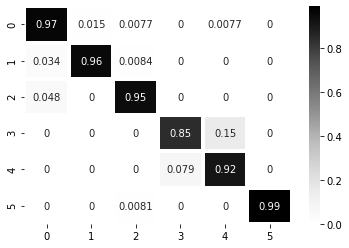

In [48]:
predict_vali = []
class_vali = []
for i, data in enumerate(dataloader_vali, 0):
  inputs = data["signal"].to(device)
  labels = data["label"].to(device)

  #Obtenemos las salidas
  outputs = model(inputs)
  #Obtenemos las predicciones
  pred = outputs.cpu().argmax(axis=1)
  #A continuacion obtendremos la prediccion hecha para cada elemento y la 
  #guardaremos en un vector, lo mismo hacemos con los labels
  for i in range(len(pred)):
    predict = pred[i].numpy().item()
    clas = labels[i].cpu().numpy().item()
    predict_vali.append(predict)
    class_vali.append(clas)

accuracy_vali = sklearn.metrics.accuracy_score(class_vali, predict_vali, normalize=True)
print('El accuracy en el conjunto de validacion es: '+str(accuracy_vali))

#Obtenemos la matriz de confusión en el conjunto de validacion
Confu2 = sklearn.metrics.confusion_matrix(class_vali, predict_vali, normalize='true')
print('Matriz de confusion al reducir caracteristicas (Validacion)')
sns.heatmap(Confu2, linewidths=3, annot=True, cmap="Greys")

### Prueba

In [49]:
predict_Red = []

for i, data in enumerate(dataloader_test, 0):
  inputs = data["signal"].to(device)

  #Obtenemos las salidas
  outputs = model(inputs)
  #Obtenemos las predicciones
  pred = outputs.cpu().argmax(axis=1)
  #A continuacion obtendremos la prediccion hecha para cada elemento y la 
  #guardaremos en un vector, lo mismo hacemos con los labels
  for i in range(len(pred)):
    predict = pred[i].numpy().item()
    predict_Red.append(predict)

predict_Red = np.array(predict_Red)
Resultados_Red = np.array(['Category'])
Resultados_Red = np.append(Resultados_Red, predict_Red+1)

final1 = np.array([id,Resultados_Red])
final1 = np.transpose(final1)

myFile = open('ResultadosRN.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(final1)

res2 = pd.read_csv('ResultadosRN.csv')
res2

,Id,Category
0,0,4
1,1,5
2,2,1
3,3,6
4,4,1
...,...,...
1995,1995,5
1996,1996,3
1997,1997,4
1998,1998,5
